Training ANN is often performed using mini-batch SGD. PyTorch offers ready to use functions to split your data into mini-batches for training. 

Here is a silly example

Text(0, 0.5, 'y')

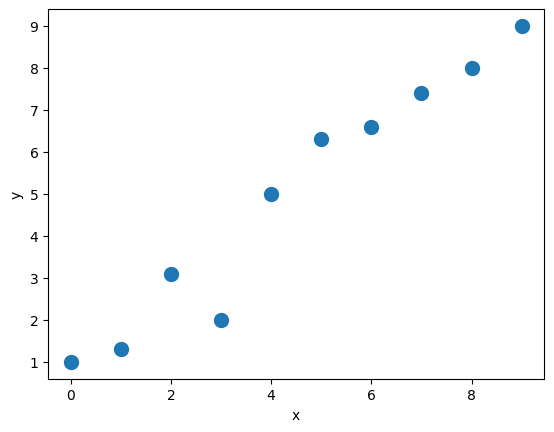

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import torch

X_train = np.arange(10,dtype = float).reshape((10))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,7.4, 8.0,9.0], dtype='float32')
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

In [56]:
X_train = np.arange(10,dtype = 'float32').reshape((10))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,7.4, 8.0,9.0], dtype='float32')


#normalize the data 
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)

#conver numpy arrays to PyTorch tensors 
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)

#create a TensorDataset 
train_dataset = torch.utils.data.TensorDataset(X_train_norm, y_train)

batch_size =  1
#pass the DataSet to a DataLoader with the desired number of elements per batch 
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle= True)



In [57]:
class LinearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        
        #this is how you define a linear system in pytorch
        self.linear = torch.nn.Linear(inputSize, outputSize, bias=True)

    #the forward methds defines the data flow
    def forward(self, x):
        out =self.linear(x)
        return out

loss_fn = torch.nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
# model = torch.nn.Linear(input_size, output_size)
model = LinearRegression(input_size, output_size)
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


num_epochs = 300
log_epochs = 10
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dataloader:
        
        #1. Generate predictions
        pred = model(x_batch)
        # 2. Calculate loss
        loss = loss_fn(pred, y_batch)
        # 3. Compute gradients
        loss.backward()
        # 4. Update parameters using gradients
        optimizer.step()
        # 5. Reset the gradients to zero
        optimizer.zero_grad()
        
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}, bias {model.linear.bias.detach().item():.4f}, coeff {model.linear.weight.detach().item():.4f}')
        #print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 63.7265, bias 0.4736, coeff -0.3420
Epoch 10 Loss 0.6766, bias 1.2902, coeff 0.2119
Epoch 20 Loss 0.1521, bias 1.9584, coeff 0.6653
Epoch 30 Loss 0.0033, bias 2.5053, coeff 1.0362
Epoch 40 Loss 0.0004, bias 2.9527, coeff 1.3399
Epoch 50 Loss 0.0290, bias 3.3191, coeff 1.5882
Epoch 60 Loss 0.4692, bias 3.6188, coeff 1.7916
Epoch 70 Loss 0.7120, bias 3.8641, coeff 1.9579
Epoch 80 Loss 0.9480, bias 4.0648, coeff 2.0941
Epoch 90 Loss 1.3395, bias 4.2290, coeff 2.2055
Epoch 100 Loss 1.0810, bias 4.3636, coeff 2.2967
Epoch 110 Loss 0.4794, bias 4.4738, coeff 2.3711
Epoch 120 Loss 0.0616, bias 4.5639, coeff 2.4321
Epoch 130 Loss 1.5201, bias 4.6376, coeff 2.4820
Epoch 140 Loss 0.0658, bias 4.6979, coeff 2.5229
Epoch 150 Loss 0.0673, bias 4.7473, coeff 2.5563
Epoch 160 Loss 0.0274, bias 4.7878, coeff 2.5837
Epoch 170 Loss 1.0560, bias 4.8209, coeff 2.6060
Epoch 180 Loss 0.1463, bias 4.8479, coeff 2.6244
Epoch 190 Loss 0.9456, bias 4.8701, coeff 2.6393
Epoch 200 Loss 0.3300, bias 4

Text(0, 0.5, 'y')

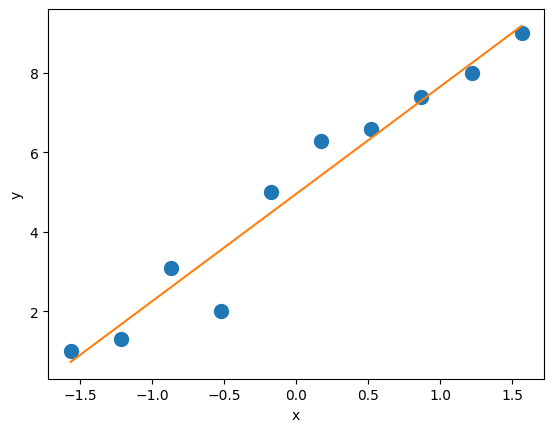

In [22]:
X_train = np.arange(10,dtype = float).reshape((10))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,7.4, 8.0,9.0], dtype='float32')
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_train_norm, X_train_norm*model.linear.weight.detach().item() + model.linear.bias.detach().item())
plt.xlabel('x')
plt.ylabel('y')

## Example 2

In [58]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=1)

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)


X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train).long()

train_ds = torch.utils.data.TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 10
train_dl = torch.utils.data.DataLoader(train_ds, batch_size, shuffle=True)


X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test).long()

In [59]:
import torch.nn as nn 

class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
#         self.nonlin = nn.Sigmoid()
        self.nonlin = nn.ReLU()
 
    def forward(self, x):
        x = self.layer1(x)
        x = self.nonlin(x)
        x = self.layer2(x)
        return x

In [60]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
 
model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 200
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

loss_test_hist = [0] * num_epochs
accuracy_test_hist = [0] * num_epochs


for epoch in range(num_epochs):
    model.train() #set the model for training
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)
    
    
    #compute the testing accuracy 
    with torch.no_grad():
        model.eval() #set the model for evaluation 
        pred_test = model(X_test_norm)

        correct = (torch.argmax(pred_test, dim=1) == y_test).float()
        accuracy_test_hist[epoch] = correct.mean()

        loss_test = loss_fn(pred_test, y_test)
        loss_test_hist[epoch] = loss_test.item()
        
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss Train {loss_hist[epoch]:.4f}, Acc Train {accuracy_hist[epoch]:.4f} Loss Test {loss_test_hist[epoch]:.4f}')

Epoch 0 Loss Train 1.1189, Acc Train 0.3300 Loss Test 1.0898
Epoch 10 Loss Train 0.8705, Acc Train 0.6900 Loss Test 0.8705
Epoch 20 Loss Train 0.6681, Acc Train 0.7200 Loss Test 0.6815
Epoch 30 Loss Train 0.5329, Acc Train 0.8200 Loss Test 0.5411
Epoch 40 Loss Train 0.4409, Acc Train 0.8700 Loss Test 0.4431
Epoch 50 Loss Train 0.3737, Acc Train 0.9000 Loss Test 0.3726
Epoch 60 Loss Train 0.3190, Acc Train 0.9200 Loss Test 0.3122
Epoch 70 Loss Train 0.2780, Acc Train 0.9400 Loss Test 0.2688
Epoch 80 Loss Train 0.2454, Acc Train 0.9500 Loss Test 0.2312
Epoch 90 Loss Train 0.2200, Acc Train 0.9500 Loss Test 0.2061
Epoch 100 Loss Train 0.2000, Acc Train 0.9500 Loss Test 0.1857
Epoch 110 Loss Train 0.1833, Acc Train 0.9500 Loss Test 0.1646
Epoch 120 Loss Train 0.1703, Acc Train 0.9500 Loss Test 0.1499
Epoch 130 Loss Train 0.1592, Acc Train 0.9500 Loss Test 0.1384
Epoch 140 Loss Train 0.1502, Acc Train 0.9500 Loss Test 0.1261
Epoch 150 Loss Train 0.1432, Acc Train 0.9700 Loss Test 0.1150
Epo

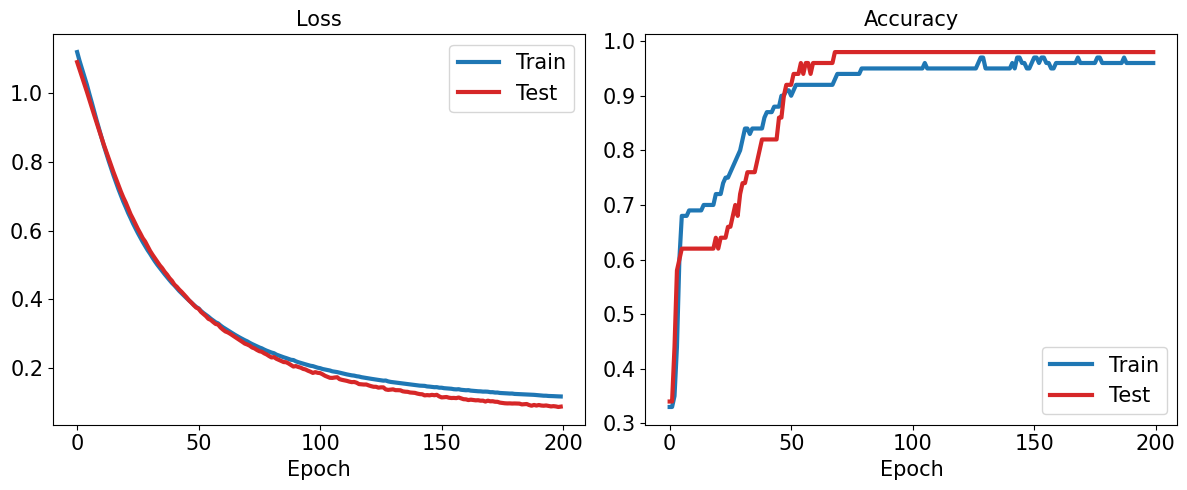

In [63]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3, label='Train', color='tab:blue')
ax.plot(loss_test_hist, lw=3, label='Test', color='tab:red')
ax.set_title('Loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3, label='Train', color='tab:blue')
ax.plot(accuracy_test_hist, lw=3, label='Test', color='tab:red')
ax.set_title('Accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=15)
plt.tight_layout()

plt.show()

### A more complex example

MNIST dataset is a dataset composed of hundreds of images of handwritten digits. The images have been digitalized and converted to black and white. 


In [31]:
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%
2.0%

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



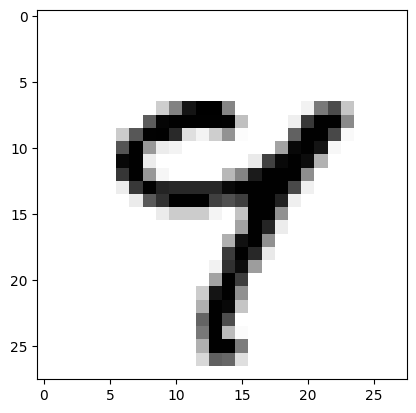

In [72]:
img, label  = mnist_trainset[54]
plt.imshow(img, cmap='binary')

In [73]:
print(label)

9


In [74]:
print(img.size)

(28, 28)


In [77]:
len(mnist_trainset)

60000

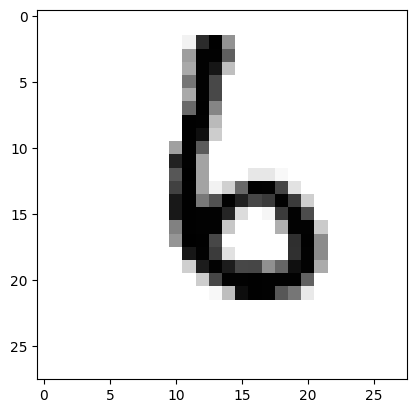

In [40]:
img, label  = mnist_trainset[1520]
plt.imshow(img, cmap='binary')

In [41]:
print(label)

6


In [42]:
print(img.size)

(28, 28)


We need to create a DataSet that can load this data. The standard ```TensorDataSet``` cannot be used because the data comes in pairs (and image and a label), so we need to create a custom dataset

To do that, we are going to create a class that inherits from Dataset


In [78]:
#the class must have three methods:

# __init__ -> defines the components
# __getitem__ -> defines the logic to get the data
#__len__ -> simply returns the length of the dataset

class DatasetTransformer(torch.utils.data.Dataset):

    def __init__(self, data, transform):
        self.data= data
        self.transform = transform

    def __getitem__(self, index):
        #get the image and the label
        img, label= self.data[index]
        return self.transform(img), label

    def __len__(self):
        return len(self.data)


In [79]:
import torchvision.transforms as transforms

#we are going to transform the image into a pytorch tensor
train_dataset_full = DatasetTransformer(mnist_trainset, transforms.ToTensor())
test_dataset  = DatasetTransformer(mnist_testset, transforms.ToTensor())

In [80]:
#take a small sample of data
import random
idx = list(range(len(train_dataset)))
random.shuffle(idx)
train_dataset = torch.utils.data.Subset(train_dataset_full, idx[0:1000])

In [90]:
#mow you can create the DataLoaders with a specific batchsize

batch_size  = 64   # Using minibatches of 128 samples

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [91]:
data_from_loader = next(iter(train_loader))

In [92]:
print(data_from_loader[0][0].size(), data_from_loader[1][0].item())

print(data_from_loader[0][1].size(), data_from_loader[1][1].item())

print(data_from_loader[0][9].size(), data_from_loader[1][9].item())

torch.Size([1, 28, 28]) 4
torch.Size([1, 28, 28]) 4
torch.Size([1, 28, 28]) 9


In [50]:
print(data_from_loader[0][128].size(), data_from_loader[1][128].item())

IndexError: index 128 is out of bounds for dimension 0 with size 10

In [93]:
class LinearNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LinearNet, self).__init__()
        self.input_size = input_size
        self.classifier = nn.Linear(self.input_size, num_classes)
        
        
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.nonlin = nn.ReLU()

    def forward(self, x):
        #make the image into a long vector
        x = x.view(x.size()[0], -1)
        x = 
        y = self.classifier(x)
        return y

model = LinearNet(1*28*28, 10)

In [103]:
class NonLinearNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NonLinearNet, self).__init__()
        self.input_size = input_size
        self.layer1 = nn.Linear(self.input_size, 500)
        
        
        self.layer2 = nn.Linear(500, num_classes)
        self.nonlin = nn.ReLU()

    def forward(self, x):
        #make the image into a long vector
        x = x.view(x.size()[0], -1)
        x = self.layer1(x)
        x = self.nonlin(x)
        x = self.layer2(x)
        return x

model = NonLinearNet(1*28*28, 10)

In [104]:
#check if the model works
out = model(data_from_loader[0])
print(out.size())

torch.Size([10, 10])


In [105]:
learning_rate = 0.01

loss_fn = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 30
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

loss_test_hist = [0] * num_epochs
accuracy_test_hist = [0] * num_epochs

log_epochs=5

for epoch in range(num_epochs):
    model.train() #set the model for training
    for x_batch, y_batch in train_loader:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        predicted_targets = torch.argmax(pred, dim=1)
        accuracy_hist[epoch] += (predicted_targets == y_batch).sum().item()
        
    loss_hist[epoch] /= len(train_loader.dataset)
    accuracy_hist[epoch] /= len(train_loader.dataset)
    
    
    #compute the testing accuracy 
    with torch.no_grad():
        model.eval() #set the model for evaluation 
        for x_batch, y_batch in test_loader:
            pred_test = model(x_batch)

            predicted_targets = torch.argmax(pred_test, dim=1)
            accuracy_test_hist[epoch] += (predicted_targets == y_batch).sum().item()

            loss_test = loss_fn(pred_test, y_batch)
            loss_test_hist[epoch] += loss.item()*y_batch.size(0)
        
        accuracy_test_hist[epoch] /= len(test_loader.dataset)
        loss_test_hist[epoch] /= len(test_loader.dataset)
        
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss {loss_hist[epoch]:.8f}, accuracy  {accuracy_hist[epoch]:0.4f}')
        print(f'        test-Loss {loss_test_hist[epoch]:.8f}, test-accuracy  {accuracy_test_hist[epoch]:0.4f}')

Epoch 0 Loss 2.30108595, accuracy  0.2000
        test-Loss 2.30108595, test-accuracy  0.2288
Epoch 5 Loss 0.00002748, accuracy  1.0000
        test-Loss 0.00002748, test-accuracy  0.4545
Epoch 10 Loss 0.00000000, accuracy  1.0000
        test-Loss 0.00000000, test-accuracy  0.4501
Epoch 15 Loss 0.00000000, accuracy  1.0000
        test-Loss 0.00000000, test-accuracy  0.4474
Epoch 20 Loss 0.00000000, accuracy  1.0000
        test-Loss 0.00000000, test-accuracy  0.4464
Epoch 25 Loss 0.00000000, accuracy  1.0000
        test-Loss 0.00000000, test-accuracy  0.4450


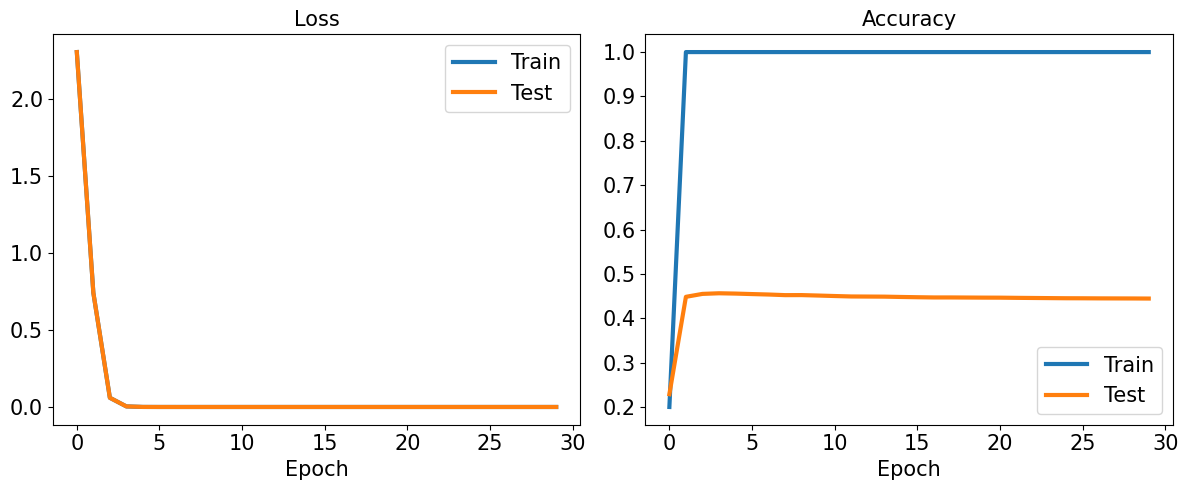

In [106]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3, label='Train')
ax.plot(loss_test_hist, lw=3, label='Test')
ax.set_title('Loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3, label='Train')
ax.plot(accuracy_test_hist, lw=3, label='Test')
ax.set_title('Accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=15)
plt.tight_layout()

plt.show()